<a href="https://www.kaggle.com/code/vedatgul/crm-analytics-rfm-analysis?scriptVersionId=123551898" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

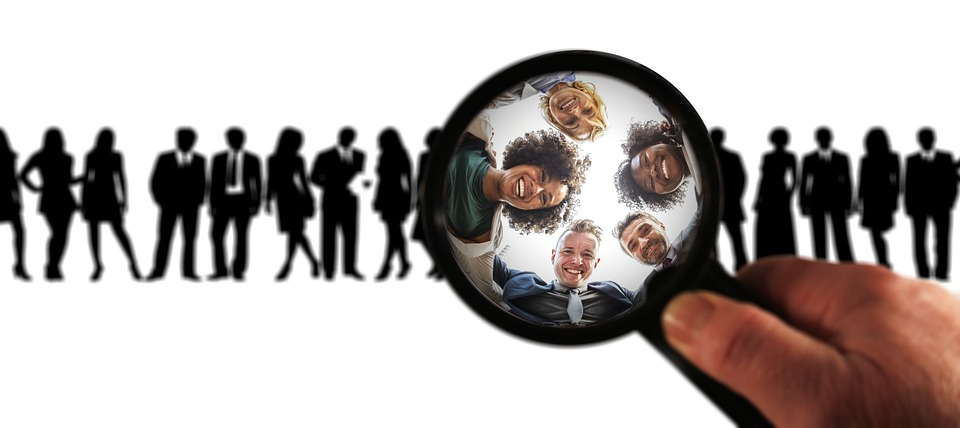

# CRM(Customer Relations Management)

It can be CRM analytics, analysis on customers, finding audiences for certain behaviors and organizing campaigns suitable for that audience.

* Managing relations with customers
* Customer lifecycle optimizations (customer lifecycle/journey/funnel)
   1. Visiting the website for the first time 
   2. The customer becomes a member 
   3. Purchase
* Communication (language, color, images, campaigns)
* Customer acquisition/finding studies
* Customer retention (abandonment) studies
* Cross-sell, up-sell
* Customer segmentation studies




# What is a KPI?
KPI, or Key Performance Indicators, allows you to answer these questions by setting personal and corporate goals and evaluating performance accordingly.

* Customer Acquisition Rate
* Customer Retention Rate
* Customer Churn Rate
* Conversion Rate
* Growth Rate

# What is a Cohort Analysis?
Cohort analysis is about examining the behavior of two or more identified customer groups. Each group studied is called a “cohort” and has certain characteristic features of its own.

# 1. Business Problem
"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

In [1]:
# Loading related libraries
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Loading the dataset
df = pd.read_csv(r"/kaggle/input/ecommerce-data/data.csv", encoding= 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.390,17850.000,United Kingdom


# 2. Data Understanding
"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

Variable Description

* InvoiceNo: Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product code that consists 5 digits.
* Description: Product name.
* Quantity: The quantities of each product per transaction.
* InvoiceDate: Represents the day and time when each transaction was generated.
* UnitPrice: Product price per unit.
* CustomerID: Customer number that consists 5 digits. Each customer has a unique customer ID.
* Country: Name of the country where each customer resides.



In [4]:
def check_df(dataframe, head=5):
    print("########## Info #############")
    print(dataframe.info())
    print("########## Shape #############")
    print(dataframe.shape)
    print("########## Data Types #############")
    print(dataframe.dtypes)
    print("########## Head of Data #############")
    print(dataframe.head(head))
    print("########## Tail of Data #############")
    print(dataframe.tail(head))
    print("########## Null Values of Data #############")
    print(dataframe.isnull().sum())
    print("########## Describe of the Numerical Datas #############")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

########## Info #############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
########## Shape #############
(541909, 8)
########## Data Types #############
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
########## Head of Data #############
  InvoiceNo StockCode                          

In [5]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.390,17850.000,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.390,17850.000,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.390,17850.000,United Kingdom,20.340


# 3. Preparation of the Data

In [6]:
# Identifying null values in the dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

In [7]:
# Removing null data from the dataset
df.dropna(inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.000,12.061,248.693,-80995.000,2.000,5.000,12.000,80995.000
UnitPrice,406829.000,3.460,69.315,0.000,1.250,1.950,3.750,38970.000
CustomerID,406829.000,15287.691,1713.600,12346.000,13953.000,15152.000,16791.000,18287.000
TotalPrice,406829.000,20.402,427.592,-168469.600,4.200,11.100,19.500,168469.600


In [9]:
df = df[~df["InvoiceNo"].str.contains("C", na = False)]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.000,13.022,180.420,1.000,2.000,6.000,12.000,80995.000
UnitPrice,397924.000,3.116,22.097,0.000,1.250,1.950,3.750,8142.750
CustomerID,397924.000,15294.315,1713.170,12346.000,13969.000,15159.000,16795.000,18287.000
TotalPrice,397924.000,22.395,309.056,0.000,4.680,11.800,19.800,168469.600


# 4. Calculation RFM Metrics
# RFM (Receny, Frequency, Monetary)
* One type of analysis
* RFM Analysis is a technique used for customer segmentation
* It enables customers to be divided into groups based on their purchasing habits and to develop strategies specific to these groups.
* It provides the opportunity to take data-based actions on many topics for CRM studies.
* RFM Metrics
    * Receny   : When did he shop (current)
    * Frequency: How often did
    * Monetary : Monetary value

In [10]:
# We should convert the InvoiceDate to date with the datetime library.

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [11]:
# To learn the recency value, to learn the last order day in the data
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [12]:
# +2 days are added to the last order day and the analysis day is determined
today_date = dt.datetime(2011, 12, 11)

In [13]:
# Calculation of Recency, Frequency and Monetary values
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'InvoiceNo': lambda num: num.nunique(),
                                     'TotalPrice': 'sum',
                                     'Description': 'sum'})

In [14]:
# Lets change the rfm columns to understandable.

rfm.columns = ["recency", "frequency", "monetary", "description"]
rfm.head()

,recency,frequency,monetary,description
CustomerID,,,,
12346.000,326,1,77183.600,MEDIUM CERAMIC TOP STORAGE JAR
12347.000,3,7,4310.000,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...
12348.000,76,4,1797.240,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...
12349.000,19,1,1757.550,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...
12350.000,311,1,334.400,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...


In [15]:
# In this part we should ignoring the monetary values that equal to 0.

rfm = rfm[rfm["monetary"] >0]

# 5. RFM Scores

In [16]:
rfm["recency_score"]   = pd.qcut(rfm["recency"], 5, labels = [5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method = "first"), 5, labels = [1,2,3,4,5])
rfm["monetary_score"]  = pd.qcut(rfm["monetary"], 5, labels = [1,2,3,4,5])
rfm["RFM_SCORE"]       = (rfm['recency_score'].astype(str) + rfm["frequency_score"].astype(str))

rfm.head()

,recency,frequency,monetary,description,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,,
12346.000,326,1,77183.600,MEDIUM CERAMIC TOP STORAGE JAR,1,1,5,11
12347.000,3,7,4310.000,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...,5,5,5,55
12348.000,76,4,1797.240,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...,2,4,4,24
12349.000,19,1,1757.550,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...,4,1,4,41
12350.000,311,1,334.400,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...,1,1,2,11


# 6. Segmentation

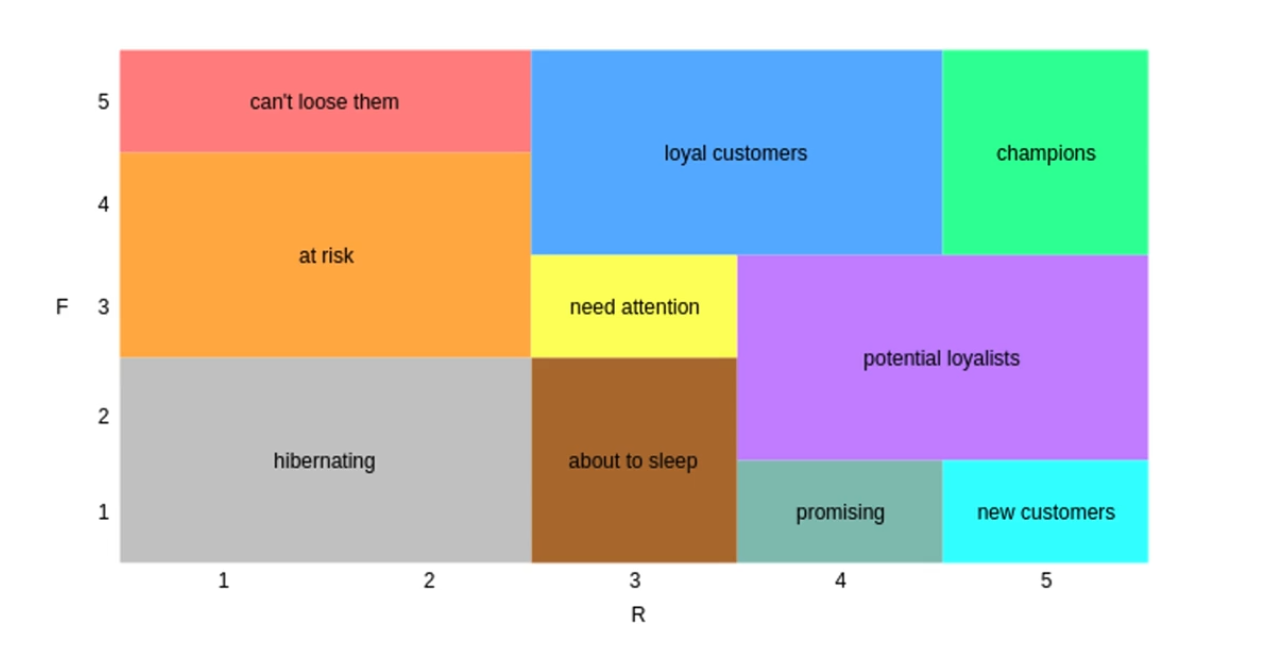

In [17]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex = True)

rfm.head()

,recency,frequency,monetary,description,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,,
12346.000,326,1,77183.600,MEDIUM CERAMIC TOP STORAGE JAR,1,1,5,11,hibernating
12347.000,3,7,4310.000,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...,5,5,5,55,champions
12348.000,76,4,1797.240,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...,2,4,4,24,at_Risk
12349.000,19,1,1757.550,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...,4,1,4,41,promising
12350.000,311,1,334.400,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...,1,1,2,11,hibernating


In [18]:
# How many customers from each segment
rfm["segment"].value_counts()

hibernating            1071
loyal_customers         819
champions               633
at_Risk                 593
potential_loyalists     484
about_to_sleep          352
need_attention          187
promising                94
cant_loose               63
new_customers            42
Name: segment, dtype: int64

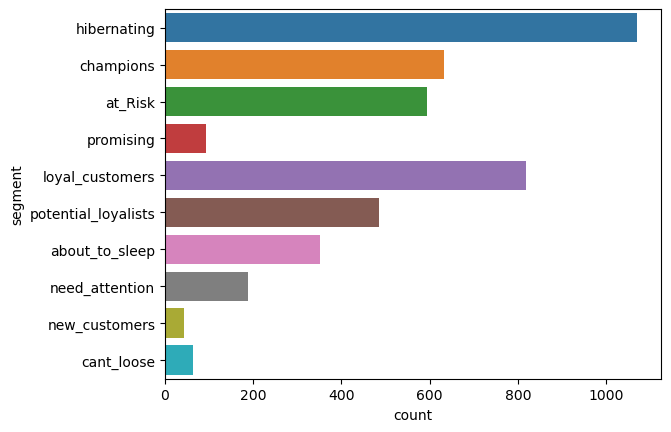

In [19]:
# Displaying segment types with countplot
sns.countplot(y ='segment', data = rfm)
 
# Show the plot
plt.show()